<h1 align='center'> বাংলায় মেশিন লার্নিংঃ পলিনমিয়াল রিগ্রেশন </h1>
<p align='center'> K M Shariat Ullah <br> Student, Dept. of Electrical and Electronic Engineering, Shahjalal University of Science and Technology, Sylhet <br> E-mail: cast.shariat@gamil.com </p>

এতক্ষণ আমরা লিনিয়ার বা সরলরেখা ফিট করে মডেল তৈরি করেছি। তবে কখনও কখনও আমরা ডাটা দেখে বুঝতে পারি এটি মূলত কোনো সরলরেখার গ্রাফ হতে পারে না। এটিকে একটি বক্ররেখা দিয়ে ফিট করতে পারলে সবচেয়ে ভালো হয়। যেমন নিচের ডাটা এবং এর গ্রাফ খেয়াল করুন। এটি মূলত একটি ডায়োড (ইলেকট্রনিক ডিভাইস) এর দুইপ্রান্তে বিভিন্ন মানের বিভব পার্থক্য প্রদান করা হলে এর মধ্যে দিয়ে কী পরিমাণ কারেন্ট প্রবাহিত হয় তার ডাটাসেট। গ্রাফ দেখেই বুঝা যাচ্ছে এটা সরলরেখা দিয়ে ফিট করলে কস্ট ফাংশন অনেক বেশি আসবে। তাই এখানে বক্ররেখা ফিট করা উচিত।

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('polynomial_feature_diode.csv')
data

,voltage,current
0,0.565657,0.003920
1,0.572727,0.005101
2,0.579798,0.006389
3,0.586869,0.002983
4,0.593939,0.009908
5,0.601010,0.019233
6,0.608081,0.018478
7,0.615152,0.031130
8,0.622222,0.029770
9,0.629293,0.036497


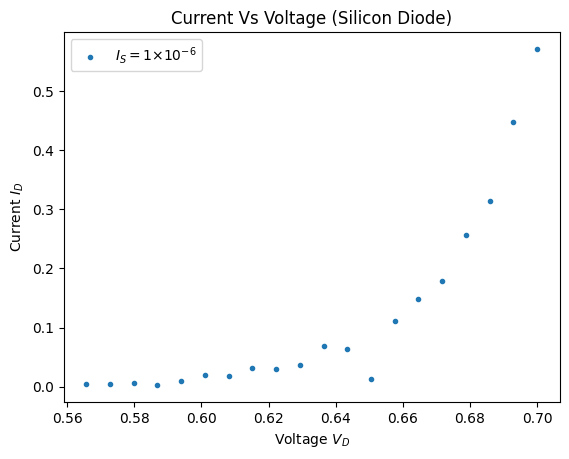

In [4]:
x_train = data.voltage
y_train = data.current

plt.scatter(x_train, y_train, marker = '.', label = '$I_S = 1×10 ^{-6}$')
plt.title('Current Vs Voltage (Silicon Diode)')
plt.xlabel('Voltage $V_D$')
plt.ylabel('Current $I_D$')
plt.legend()
plt.show()

#### Polynomial Regression

বক্ররেখা ফিট করার জন্য আমরা লিনিয়ার মডেলের জায়গায় নিচের মতো পলিনমিয়াল মডেল ব্যবহার করি। এখানে বিভিন্ন ফিচারের সূচক (Power) এক এক করে বৃদ্ধি করা যেতে পারে। আর আমরা জানি $x$ এর উপর 1 ছাড়া অন্য কোনো পাওয়ার আছে মানে সাধারণত তা একটি বক্ররেখা বুঝায়। আমাদের একটা ফিচার ($x$) এর জন্য পলিনমিয়াল রিগ্রেশনের মডেল হবে - 

$$f(w_i,b) = w_1 x + w_2 x ^2 +b $$

এটিকে বলা হয় `2nd Degree Polynomial Regression` যেহেতু এখানে ফিচারের উপর সর্বোচ্চ ঘাত 3। নিচের পলিনমিয়ালকে আবার 3rd Degree Polynomial Regression বলা যায়। 

$$f(w_i,b) = w_1 x + w_2 x ^2 + w_3 x^3 +b $$

যদি একাধিক ফিচার ($x_1, x_2, ..., x_i$) থাকে তবে আমরা তাকে লিখতে পারি 

$$f(w_i,b) = w_1 x_1 + w_2 x_1 ^2 + w_3 x_2 + w_4 x_2 ^2 + +b $$

এখানে একটি সেকেন্ড ডিগ্রি পলিনমিয়াল ফিট করা হয়েছে এবং এখানে দুইটা ফিচার আছে। এটা জরুরি নয় যে ফিচার আর পলিনমিয়ালের ডিগ্রি সবসময় সেইমই হবে। ডাটা অনুযায়ী বুঝে ডিগ্রি কত হবে তা সেট করা উচিত। কোনটি ফিট করা উচিত তা নিচের গ্রাফ থেকে একটা আন্দাজ করা যায়, আপনার ডাটাসেট নিচের যেই গ্রাফের সবচেয়ে কাছাকাছি দেখতে তত ডিগ্রির মডেল ফিট করলে আশানুরূপ ফল পাবেন। 

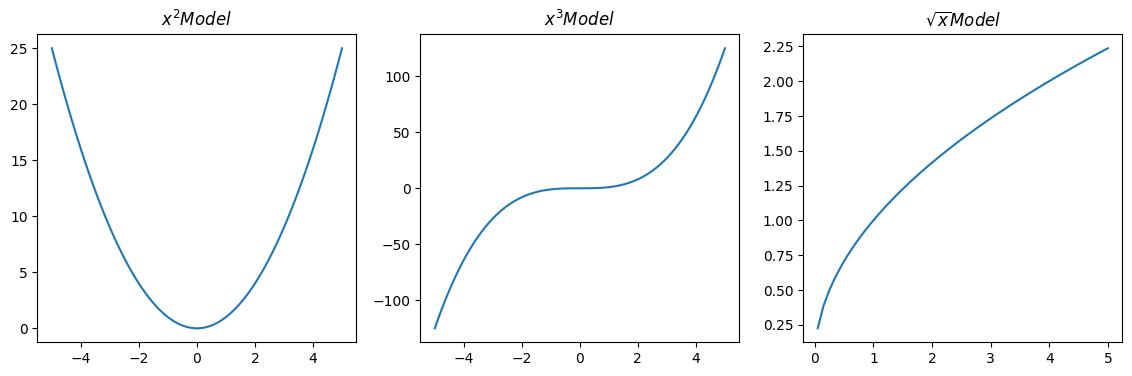

In [43]:
x_ = np.linspace(-5,5,100)
y_2nd = x_ ** 2
y_3rd = x_ ** 3
y_sqrt = np.sqrt(x_[50:100])

plt.figure(figsize=(14, 4))
ax1 = plt.subplot(1,3,1)
ax1.plot(x_,y_2nd)
ax1.set_title('$x^2 Model$')

ax2 = plt.subplot(1,3,2)
ax2.plot(x_, y_3rd)
ax2.set_title('$x^3 Model$')

ax3 = plt.subplot(1,3,3)
ax3.plot(x_[50:100], y_sqrt)
ax3.set_title('$\\sqrt{x} Model$')

plt.show()


এখন আমাদের ডাটাসেট (কারেন্ট বনাম ভোল্টেজ) এর গ্রাফটা দেখতে 3rd Order Polynomial Model এর ডানপাশের অর্ধেকের মত দেখাচ্ছে। আমরা চাইলে থার্ড অর্ডার একটা মডেল সেট করতে পারি। এখানে ফিচার একটাই (ভোল্টেজ $x$)। তাই মডেলটি হবে 

$$ f(w_i,x) = w_1 x + w_2 x ^2 + w_3 x^3 + b $$

আগের মতোই এই মডেলটিকে আমরা নরমালাইজ করব। এরপর প্রাথমিকভাবে weight ও base এর কিছু মান ধরে নিয়ে আমরা গ্রেডিয়েন্স ডিসেন্ট ও কস্ট ফাংশন হিসেবে করে করে এই মডেলটির জন্য বেস্টফিটের জন্য w ও b এর মানগুলো বের করার চেষ্টা করব। 

#### Coding Implementation 

Final w_1: 0.040056893578729665
Final w_2: 0.0886974693159162
Final b: 0.028367515426781544


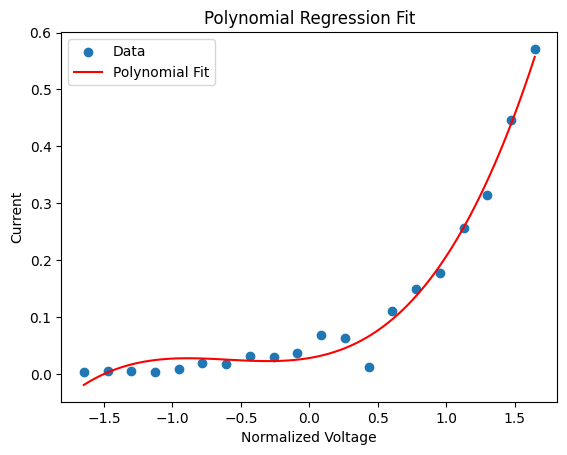

In [96]:
# Feature normalization
x_train = (x_train - np.mean(x_train)) / np.std(x_train)

# Initialize coefficients
w_1 = 0.0
w_2 = 0.0
w_3 = 0.0 
b = 0.0

# Learning rate
alpha = 0.01

# Number of training examples
m = len(x_train)

# Function to compute gradients using 1/2m formulation
def compute_gradients(x, y, w_1, w_2, w_3, b):
    y_pred = w_1 * x + w_2 * x**2 + w_3 * x**3 + b
    error = y_pred - y
    
    dj_dw1 = np.sum(error * x) / m
    dj_dw2 = np.sum(error * x**2) / m
    dj_dw3 = np.sum(error * x**3) / m
    dj_db = np.sum(error) / m
    
    return dj_dw1, dj_dw2, dj_dw3, dj_db

# Gradient descent
num_iterations = 1000

for i in range(num_iterations):
    dj_dw1, dj_dw2, dj_dw3, dj_db = compute_gradients(x_train, y_train, w_1, w_2, w_3, b)
    
    # Update parameters
    w_1 -= alpha * dj_dw1
    w_2 -= alpha * dj_dw2
    w_3 -= alpha * dj_dw3
    b -= alpha * dj_db

# Output the final parameters
print(f'Final w_1: {w_1}')
print(f'Final w_2: {w_2}')
print(f'Final b: {b}')

# Plot the data and the fitted curve
x_plot = np.linspace(min(x_train), max(x_train), 100)
y_plot = w_1 * x_plot + w_2 * x_plot**2 + w_3 * x_plot**3 + b

plt.scatter(x_train, y_train, label='Data')
plt.plot(x_plot, y_plot, color='r', label='Polynomial Fit')
plt.xlabel('Normalized Voltage')
plt.ylabel('Current')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

#### Prediction

গ্রেডিয়েন্ট ডিসেন্টের মাধ্যমে আমরা যে weith ও base এর মান পাই তা হিসেবে আমাদের মডেল দাঁড়ায় - 

$$f(w_i,b) =  0.040 x + 0.088 x ^2 + 0.028$$

যদি আমি জিজ্ঞেস করি যখন ভোল্টেজ 0.5 V তখন কারেন্ট কত, উত্তর হবে - 
$$ y = 0.040 \times 0.5 + 0.088 \times 0.5^2 + 0.028 \\ 
\Rightarrow = 0.070 $$

এখানে একটা বিষয় একটু বলি, আমাদের ফিচার কিন্তু ছিল কেবলমাত্র একটা $x$। কিন্তু আমরা যখনই $x ^2$ অতিরিক্ত এনেছি, তখন আসলে আমরা অতিরিক্ত একটা ফিচার তৈরি করে নিয়েছি। পলিনমিয়াল রিগ্রেশন করলে এরকম ফিচার বৃদ্ধি পায়। একে `Feature Extension` বলে। 